In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# load imdb data
df = pd.read_csv('./data/movies.csv', index_col='Title')
del df['Unnamed: 0']
df.head()

,Revenues,Budget,Runtime,Certificate,ReleaseDate,Score,Votes,Directors,Writers,Stars,Genres
Title,,,,,,,,,,,
The Shawshank Redemption,2.881729e+07,25000000.0,2h 22m,13+,1995-03-10,93,2500000,['Frank Darabont'],"['Stephen King', 'Frank Darabont']","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton']",['Drama']
The Godfather,2.461210e+08,6000000.0,2h 55m,18+,1973-10-01,92,1700000,['Francis Ford Coppola'],"['Mario Puzo', 'Francis Ford Coppola']","['Marlon Brando', 'Al Pacino', 'James Caan']","['Crime', 'Drama']"
The Godfather: Part II,4.803578e+07,13000000.0,3h 22m,18+,1974-12-18,90,1200000,['Francis Ford Coppola'],"['Francis Ford Coppola', 'Mario Puzo']","['Al Pacino', 'Robert De Niro', 'Robert Duvall']","['Crime', 'Drama']"
The Dark Knight,1.005974e+09,185000000.0,2h 32m,16+,2008-07-25,90,2500000,['Christopher Nolan'],"['Writers', 'Jonathan Nolan', 'Christopher Nol...","['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['Action', 'Crime', 'Drama', 'Thriller']"
12 Angry Men,9.550000e+02,350000.0,1h 36m,15+,1960-04-01,90,740000,['Sidney Lumet'],['Reginald Rose'],"['Henry Fonda', 'Lee J. Cobb', 'Martin Balsam']","['Crime', 'Drama']"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, The Shawshank Redemption to 96
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Revenues     241 non-null    float64
 1   Budget       221 non-null    float64
 2   Runtime      250 non-null    object 
 3   Certificate  250 non-null    object 
 4   ReleaseDate  250 non-null    object 
 5   Score        250 non-null    int64  
 6   Votes        250 non-null    int64  
 7   Directors    250 non-null    object 
 8   Writers      250 non-null    object 
 9   Stars        250 non-null    object 
 10  Genres       250 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 23.4+ KB


In [4]:
df['Runtime'] = df['Runtime'].apply(lambda x: int(x[0])*60 + int(x[3:-1]) if (len(x)>3) else int(x[0])*60).astype(int)


df['Genres'] = df['Genres'].apply(lambda x: x.strip('[').strip(']').strip("'").split("', '"))

In [5]:
df['Day'] = df['ReleaseDate'].apply(lambda x: x.split('-')[2]).astype(int)
df['Month'] = df['ReleaseDate'].apply(lambda x: x.split('-')[1]).astype(int)
df.shape

(250, 13)

In [6]:
df.fillna(value=0, inplace=True)

In [7]:
print(np.where(df['Revenues']==0))
print(np.where(df['Budget']==0))

(array([ 84, 132, 161, 181, 189, 190, 221, 232, 240]),)
(array([ 31,  77,  84,  89,  90,  91,  99, 107, 115, 126, 132, 164, 167,
       180, 182, 188, 189, 192, 202, 206, 209, 215, 224, 225, 233, 242,
       245, 248, 249]),)


In [8]:
df['Budget'][df['Budget']>330_000_000] = df['Budget'][df['Budget']<330_000_000].mean()

/tmp/ipykernel_27420/1404209010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Budget'][df['Budget']>330_000_000] = df['Budget'][df['Budget']<330_000_000].mean()


In [9]:
df['Revenues'] = df['Revenues'].replace(0, np.mean(df['Revenues']))
df['Budget'] = df['Budget'].replace(0, np.mean(df['Budget']))

In [10]:
df['Revenues'] = df['Revenues'].astype(int)
df['Budget'] = df['Budget'].astype(int)

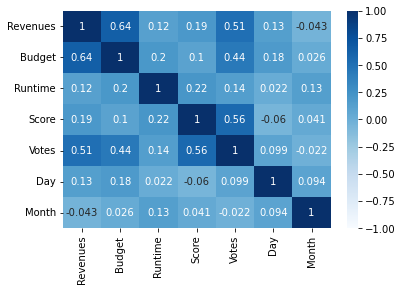

In [11]:
sns.heatmap(df.corr(), cmap="Blues", annot=True, vmin=-1, vmax=1);

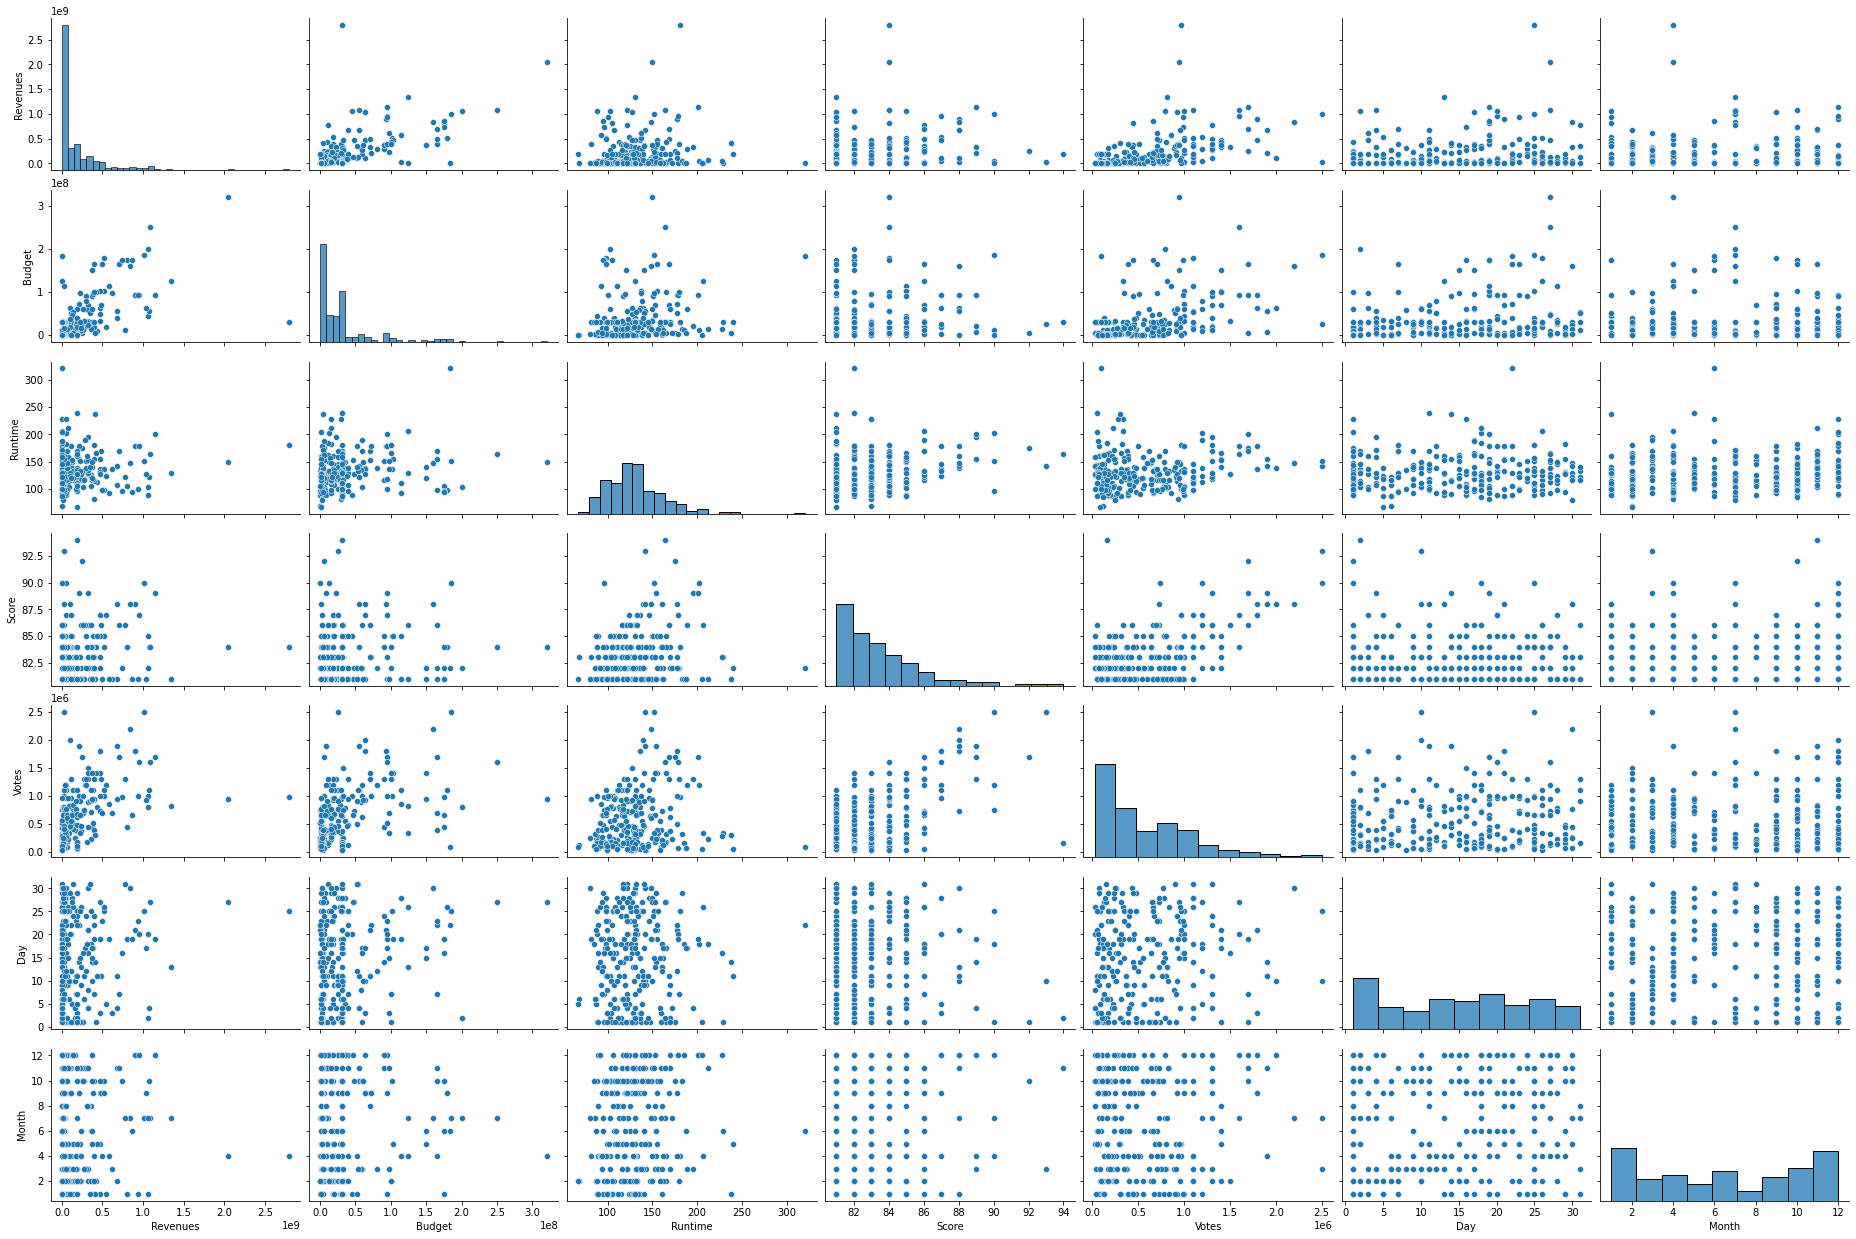

In [12]:
sns.pairplot(df, aspect=1.5);

In [13]:
dummies1 = pd.get_dummies(df['Genres'].apply(pd.Series).stack()).sum(level=0)
dummies2 = pd.get_dummies(df['Certificate'].apply(pd.Series).stack()).sum(level=0)

df.drop('Genres', axis = 1, inplace=True)
df.drop('Certificate', axis = 1, inplace=True)

X = pd.concat([df, dummies1,dummies2], axis = 1)

/tmp/ipykernel_27420/2271454874.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummies1 = pd.get_dummies(df['Genres'].apply(pd.Series).stack()).sum(level=0)
/tmp/ipykernel_27420/2271454874.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummies2 = pd.get_dummies(df['Certificate'].apply(pd.Series).stack()).sum(level=0)


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, The Shawshank Redemption to 96
Data columns (total 50 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Revenues     250 non-null    int64 
 1   Budget       250 non-null    int64 
 2   Runtime      250 non-null    int64 
 3   ReleaseDate  250 non-null    object
 4   Score        250 non-null    int64 
 5   Votes        250 non-null    int64 
 6   Directors    250 non-null    object
 7   Writers      250 non-null    object
 8   Stars        250 non-null    object
 9   Day          250 non-null    int64 
 10  Month        250 non-null    int64 
 11  Action       250 non-null    uint8 
 12  Adventure    250 non-null    uint8 
 13  Animation    250 non-null    uint8 
 14  Biography    250 non-null    uint8 
 15  Comedy       250 non-null    uint8 
 16  Crime        250 non-null    uint8 
 17  Drama        250 non-null    uint8 
 18  Family       250 non-null    uint8 
 19  Fantasy     

In [15]:
lreg = LinearRegression()

X = X.drop(['Revenues', 'ReleaseDate', 'Score', 'Votes',
            'Directors', 'Writers', 'Stars'], axis=1)

In [16]:
x_train, x_cv, y_train, y_cv = train_test_split(X, df['Revenues'], test_size =0.2)

In [17]:
lreg.fit(x_train, y_train)

LinearRegression()

In [18]:
lreg.score(x_cv, y_cv)

0.25543197994591904

<AxesSubplot:title={'center':'Modal Coefficients'}>

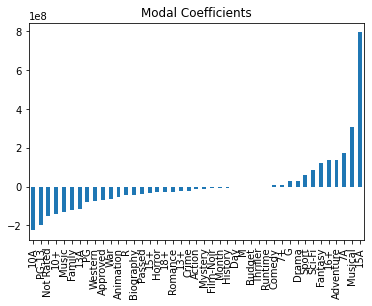

In [19]:
predictors = x_train.columns

coef = pd.Series(lreg.coef_, predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

In [20]:
from sklearn.linear_model import Ridge

##training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(x_train, y_train)

pred = ridgeReg.predict(x_cv)

##calculating mse

mse = np.mean((pred - y_cv)**2)
mse

3.403113529990151e+16

In [21]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.3, normalize=True)

lassoReg.fit(x_train, y_train)

pred = lassoReg.predict(x_cv)

#calculating mse

mse = np.mean((pred - y_cv)**2)
mse

/home/monder/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3608541444723712.0, tolerance: 2493841360920752.5
  model = cd_fast.enet_coordinate_descent(


3.584875169936442e+16

In [22]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)

ENreg.fit(x_train,y_train)

pred_cv = ENreg.predict(x_cv)

#calculating mse

mse = np.mean((pred_cv - y_cv)**2)
mse

4.3278574941667304e+16

In [23]:
ENreg.score(x_cv, y_cv) #R-Squar

0.10643116443102874

In [24]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')

In [25]:
split_and_validate(X, df['Revenues'])


Validation R^2 score was: 0.40334931605383284
Feature coefficient results: 

Budget : 3.89
Runtime : -323461.83
Day : 1007596.37
Month : -8855334.05
Action : 6091954.09
Adventure : 158729687.60
Animation : -73689806.09
Biography : -95285101.19
Comedy : -7381471.68
Crime : -23299835.31
Drama : 30782332.55
Family : -112673575.66
Fantasy : 63040035.66
Film-Noir : 10101799.47
History : 58424873.95
Horror : -59124329.81
Music : -88595042.03
Musical : 529731724.37
Mystery : 20047000.23
Romance : -9923695.35
Sci-Fi : 62840046.36
Sport : 13044704.45
Thriller : -54841615.10
War : -53343774.59
Western : -65039048.44
10+ : -158570156.57
10A : -83588432.36
13+ : -8755646.40
13A : -10145254.27
15+ : -14947292.12
15A : 850434758.91
16+ : 103980622.65
18+ : 14117693.90
7+ : 39648105.88
7A : -146324842.20
Approved : -45843072.10
G : 64105513.85
M : -152628275.33
Not Rated : -128310320.24
PG : -35510695.71
PG-13 : -248142087.73
Passed : -46496868.49
R : 6976248.33


In [26]:
df2 = X.copy()

df2['budget2'] = df2['Budget'] ** 2

split_and_validate(df2, df['Revenues'])


Validation R^2 score was: 0.3732816361748029
Feature coefficient results: 

Budget : 3.37
Runtime : 96699.16
Day : 1694507.82
Month : -6363306.67
Action : -73487.70
Adventure : -182187.74
Animation : -89409.55
Biography : -29404.17
Comedy : 2354.99
Crime : 21327.64
Drama : 87067.09
Family : -67411.81
Fantasy : -81058.79
Film-Noir : 270.67
History : 17099.78
Horror : 1607.88
Music : 3811.02
Musical : 3027.02
Mystery : 28024.70
Romance : 104355.77
Sci-Fi : -45250.84
Sport : -21152.06
Thriller : -29085.14
War : 97460.75
Western : -597.67
10+ : -6846.65
10A : -16672.63
13+ : 69259.94
13A : -4502.17
15+ : 92155.57
15A : -15425.04
16+ : -79845.81
18+ : 44219.45
7+ : -51171.34
7A : -10898.29
Approved : 11773.64
G : 27648.10
M : -1015.60
Not Rated : -32972.36
PG : -32831.42
PG-13 : -11526.87
Passed : -1075.81
R : 19727.29
budget2 : 0.00
